# Ejemplo: Diferencia en el uso de herencias / clases abstractas / interfaz

## Utilizar Herencia

Supongamos que tenemos una clase base **Vehiculo** que define algunos comportamientos generales (como el arranque y el freno), pero cada tipo de vehículo puede tener comportamientos específicos.

Los vehículos de tipo **Automovil**, **Motocicleta** y **Bicicleta** extienden esta clase base.

Un diagrama de clases puede ser representado así

![](attachment:image-2.png)
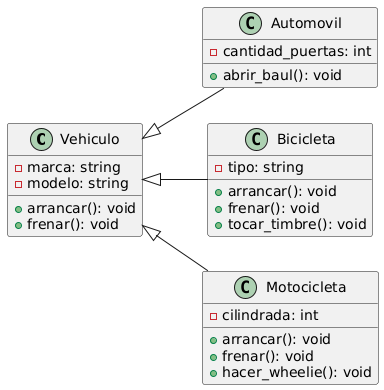

[Link al diagrama](https://planttext.com?text=dPAnJiD038RtI7a7Zo2K5uWO2ZihQ-JutCQISwuSNnbetvqWHD96NU36pzR_-Notcm8zogXrfRmF20ENmn2Gn9b2BDTLNP7YDC4x3q953Jxh2kRJm8XEsC8KBlcmG4kiTakV0Dqn4_h3Omida_JBzyxvcbvMtqi96-qakWe9SqZ2r1qBU-3KWkHO5BsBTpqMlHltAYIa7BZ6XHp_FUWF3PjRkv2nTxvhVREvPUibKSd9CU7j1Vwa7f3Oku-1MMNhNfxg-TmqwoAtXMKbsyBLrDznEyvf_YDV)

Vehiculo es la clase base, y Automovil, Motocicleta y Bicicleta son clases derivadas.

Automovil y Motocicleta heredan el comportamiento de *arrancar()* y *frenar()* de Vehiculo, pero agregan un comportamiento específico, como *abrirBaul()*, *tocarTimbre()* o *hacerWheelie()*.

En este caso, la clase base proporciona toda la funcionalidad común, y las clases derivadas pueden extenderla o modificarla.

### En código esto es:

In [ ]:
class Vehiculo:
    def __init__(self, marca, modelo):
        self.marca = marca
        self.modelo = modelo

    def arrancar(self):
        print(f"{self.marca} {self.modelo} arrancando")

    def frenar(self):
        print(f"{self.marca} frenando")

class Automovil(Vehiculo):
    def __init__(self, marca, modelo, cantidadPuertas):
        super().__init__(marca, modelo)
        self.cantidadPuertas = cantidadPuertas

    def abrirBaul(self):
        print("Baúl abierto")

class Bicicleta(Vehiculo):
    def __init__(self, marca, modelo, tipo):
        super().__init__(marca, modelo)
        self.tipo = tipo  # por ejemplo, "urbana", "montaña"

    def arrancar(self):
        print(f"{self.marca} {self.modelo} pedaleando")

    def frenar(self):
        print("Frenando con freno de disco")

    def tocarTimbre(self):
        print("¡Ring ring!")

class Motocicleta(Vehiculo):
    def __init__(self, marca, modelo, cilindrada):
        super().__init__(marca, modelo)
        self.cilindrada = cilindrada

    def arrancar(self):
        print(f"{self.marca} encendiendo...")

    def frenar(self):
        print("Frenando con ABS")

    def hacerWheelie(self):
        print("¡Wheelie!")

    def getCilindrada(self):
        return self.cilindrada

# Creando instancias
auto = Automovil("Toyota", "Corolla", 4)
auto.arrancar()
auto.abrirBaul()

bici = Bicicleta("Venzo", "MTB", "montaña")
bici.arrancar()
bici.tocarTimbre()

moto = Motocicleta("Yamaha", "FZ", 250)
moto.arrancar()
print(f"Cilindrada: {moto.getCilindrada()}cc")

Toyota Corolla arrancando
Baúl abierto
Venzo MTB pedaleando
¡Ring ring!
Yamaha encendiendo...
Cilindrada: 250cc


## Utilizando clase abstracta Vehículo
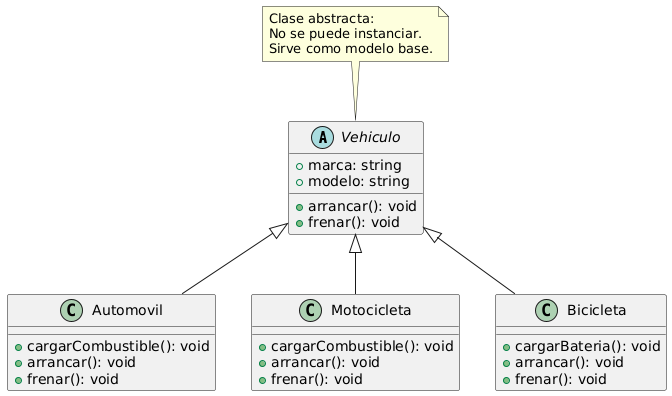

[Link al diagrama](https://planttext.com?text=jPB1JiCm38RlaV8ElWs4jWUeE8nD7E62nDrDlM4fZIVNxGLuTzp1kga22GcHGwJyJl9_YVzrPwZMjpc66B3kJ34Pf8nT1y_qmgdF0gynW8yRQ54JLk2xkEmdKHhACbTH5Kj2lRgkO11kJlfEgSpL1Tmxnj6Le0ZuVEYf8U3YUacC2Wqh9SEMYb4CxoFk9-LTRzBAmFcCwRPxrAsqTTyPrvdc4B-5kx1v49F4APE3_glHXd-msQ2HClx9OchfxTjoUVwwUU7YiVFIX3TULyG8J0uWkoajCMoFVJo52QiO7h_jwIg69zQ183d5LuoWzhDUeDB0UFleilQ59_G3)

En este caso pueden pasar dos cosas de acuerdo a cómo modelamos el ejemplo:

- Opción 1: "Todo vehículo tiene que saber arrancar y frenar, pero cada uno lo hará a su manera." Los métodos serán abstractos y cada hijo debe implementarlo. Sin embargo, los atributos se siguen heredando de la clase Vehículo.

- Opción 2: Si hay una lógica común para todos los hijos, la clase abstracta puede implementar parte o todo del método. Entonces, los hijos pueden: heredar la lógica tal cual o sobrescribir (override) si necesitan algo especial.

### Cuestiones comunes en herencia o utilizando clases abstractas:

El sentido básico tanto de la herencia como de la clase abstracta es compartir comportamiento.

- Se pueden heredar atributos
- Se pueden agregar nuevos atributos
- Se pueden redefinir métodos
- Se pueden agregar nuevos métodos

### Particularidad de la clase abstracta

La clase abstracta nunca se instancia, sirve como modelo base

### En código utilizar clases abstractas significa:

In [1]:
from abc import ABC, abstractmethod

# Clase abstracta
class Vehiculo(ABC):
    def __init__(self, marca, modelo):
        self.marca = marca
        self.modelo = modelo

    @abstractmethod
    def arrancar(self):
        pass

    @abstractmethod
    def frenar(self):
        pass

# Clases hijas que implementan los métodos de la clase abstracta
class Automovil(Vehiculo):
    def __init__(self, marca, modelo, tipo_combustible):
        super().__init__(marca, modelo)
        self.tipo_combustible = tipo_combustible

    def arrancar(self):
        print(f"{self.marca} {self.modelo} arrancando...")

    def frenar(self):
        print(f"{self.marca} {self.modelo} frenando...")

    def cargarCombustible(self):
        print(f"Cargando combustible en el {self.marca} {self.modelo}")

class Motocicleta(Vehiculo):
    def __init__(self, marca, modelo, tipo_combustible):
        super().__init__(marca, modelo)
        self.tipo_combustible = tipo_combustible

    def arrancar(self):
        print(f"{self.marca} {self.modelo} arrancando...")

    def frenar(self):
        print(f"{self.marca} {self.modelo} frenando...")

    def cargarCombustible(self):
        print(f"Cargando combustible en la motocicleta {self.marca} {self.modelo}")

class Bicicleta(Vehiculo):
    def __init__(self, marca, modelo, tipo_bateria):
        super().__init__(marca, modelo)
        self.tipo_bateria = tipo_bateria

    def arrancar(self):
        print(f"{self.marca} {self.modelo} pedaleando...")

    def frenar(self):
        print(f"{self.marca} {self.modelo} frenando con freno de mano...")

    def cargarBateria(self):
        print(f"Cargando batería en la bicicleta {self.marca} {self.modelo}")

# Instanciamos las clases hijas
auto = Automovil("Toyota", "Corolla", "Gasolina")
auto.arrancar()
auto.frenar()
auto.cargarCombustible()

moto = Motocicleta("Yamaha", "FZ", "Gasolina")
moto.arrancar()
moto.frenar()
moto.cargarCombustible()

bici = Bicicleta("Venzo", "MTB", "Li-ion")
bici.arrancar()
bici.frenar()
bici.cargarBateria()

Toyota Corolla arrancando...
Toyota Corolla frenando...
Cargando combustible en el Toyota Corolla
Yamaha FZ arrancando...
Yamaha FZ frenando...
Cargando combustible en la motocicleta Yamaha FZ
Venzo MTB pedaleando...
Venzo MTB frenando con freno de mano...
Cargando batería en la bicicleta Venzo MTB


In [2]:
# No se puede instanciar la clase abstracta
# Esto arrojará un error: TypeError: Can't instantiate abstract class Vehiculo with abstract methods arrancar, frenar
vehiculo = Vehiculo("Marca", "Modelo")  # Esto no se puede hacer

TypeError: Can't instantiate abstract class Vehiculo with abstract methods arrancar, frenar

## Utilizando una interfaz Vehículo

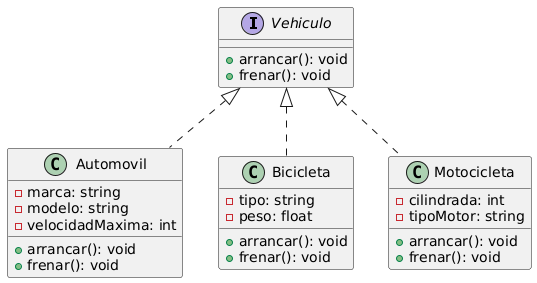

[Link al diagrama](https://planttext.com?text=fPA_3e8m48Tt4jwXeyR80n07T6TrlroBNb9wv5g8YVhkbXZ-29EXutVj_RvUM_W04jhQfacQa0j6Aa2ZhkPEs5fMppHHSHqKY813aDq-LnsJ7dWbnitfks-45hnNvpPmpHtPeSjHrI08kV91oDr6oDfONj8kCYGDkeG7rV5GjDiWSo4aj2R091EeMQKsnaTMMOOjOIK7NiKXMN9QGC_lyhNezyklof-vuuETNbasJNvP6AUmBCoC-tQ5SJf-YWy0)


En este caso, el sentido que se le da a la interfaz es forzar contratos sin lógica.

### Consideraciones en el uso de interfaces:

- Las interfaces no tienen atributos, solo métodos.
- Las clases que implementan la interfaz tienen atributos propios.
- Una clase que implementa una interfaz puede tener otros métodos y atributos propios, además de los que le exige la interfaz.

### En código el uso de intefaz:

In [ ]:
from abc import ABC, abstractmethod

# Interface Vehiculo
class IVehiculo(ABC):
    @abstractmethod
    def arrancar(self):
        pass

    @abstractmethod
    def frenar(self):
        pass

# Clase Automovil que implementa la interfaz Vehiculo
class Automovil(IVehiculo):
    def __init__(self, marca, modelo, velocidadMaxima):
        self.marca = marca
        self.modelo = modelo
        self.velocidadMaxima = velocidadMaxima

    def arrancar(self):
        print(f"{self.marca} {self.modelo} arrancando...")

    def frenar(self):
        print(f"{self.marca} {self.modelo} frenando...")

# Clase Bicicleta que implementa la interfaz Vehiculo
class Bicicleta(IVehiculo):
    def __init__(self, tipo, peso):
        self.tipo = tipo
        self.peso = peso

    def arrancar(self):
        print(f"Bicicleta {self.tipo} comenzando a pedalear...")

    def frenar(self):
        print(f"Bicicleta {self.tipo} frenando...")

# Clase Motocicleta que implementa la interfaz Vehiculo
class Motocicleta(IVehiculo):
    def __init__(self, cilindrada, tipoMotor):
        self.cilindrada = cilindrada
        self.tipoMotor = tipoMotor

    def arrancar(self):
        print(f"Motocicleta {self.tipoMotor} arrancando...")

    def frenar(self):
        print(f"Motocicleta {self.tipoMotor} frenando...")

# Creación de instancias
auto = Automovil("Toyota", "Corolla", 180)
bicicleta = Bicicleta("Montaña", 12.5)
moto = Motocicleta(1000, "4 tiempos")

# Llamada a los métodos
auto.arrancar()
auto.frenar()

bicicleta.arrancar()
bicicleta.frenar()

moto.arrancar()
moto.frenar()

Toyota Corolla arrancando...
Toyota Corolla frenando...
Bicicleta Montaña comenzando a pedalear...
Bicicleta Montaña frenando...
Motocicleta 4 tiempos arrancando...
Motocicleta 4 tiempos frenando...


## Un ejemplo de cuándo optar por el uso de una interfaz

Se está diseñando un sistema que maneja múltiples tipos de pagos. Algunos pagos se realizan a través de tarjetas de crédito, otros mediante transferencias bancarias, y otros usando plataformas de pago como MercadoPago. Cada tipo de pago tiene su propia forma de ser procesado, pero todos deben cumplir con ciertas acciones comunes, como procesar el pago y verificar el estado del pago.

En este caso, utilizaríamos una interfaz para garantizar que todas las clases que representan medios de pago proporcionen los mismos métodos (como procesar_pago() y verificar_estado()), pero no tendrían que compartir un comportamiento común más allá de estos métodos, porque cada tipo de pago tiene su propia lógica de implementación.

La interfaz simplemente establece un contrato sobre los métodos que deben existir, sin imponer una implementación o una estructura base común. Esto es especialmente útil cuando las implementaciones pueden variar considerablemente, y no hay necesidad de heredar una implementación común.

### En código el uso de la interfaz para definir el contrato para implementar un Método de pago se puede ver así:

In [ ]:
from abc import ABC, abstractmethod

# Interfaz
class IMetodoPago(ABC):
    @abstractmethod
    def procesarPago(self, monto: float):
        pass

    @abstractmethod
    def verificarEstado(self) -> bool:
        pass

# Implementación de la interfaz para Tarjeta de Crédito
class TarjetaCredito(IMetodoPago):
    def __init__(self, numero, titular):
        self.numero = numero
        self.titular = titular

    def procesarPago(self, monto: float):
        print(f"Procesando pago de ${monto} con tarjeta de crédito.")

    def verificarEstado(self) -> bool:
        # Verifica si la tarjeta es válida
        return True  # Simulación de validación

# Implementación de la interfaz para MercadoPago
class MercadoPago(IMetodoPago):
    def __init__(self, cuentaEmail):
        self.cuentaEmail = cuentaEmail

    def procesarPago(self, monto: float):
        print(f"Procesando pago de ${monto} con MercadoPago.")

    def verificarEstado(self) -> bool:
        # Verifica si el estado de la cuenta MP es válido
        return True  # Simulación de validación

# Ejemplo de uso: en un ejemplo más complejo podría haber una clase que tenga métodos para validar el método de pago x ejemplo cuando hay que validar una tarjeta en Uber
# y para ello se nos debita un monto de prueba

def realizarPago(metodoPago: IMetodoPago, monto: float):
    metodoPago.procesarPago(monto)
    if metodoPago.verificarEstado():
        print("Pago exitoso!")
    else:
        print("Pago fallido.")

# Crear instancias de los diferentes métodos de pago
tarjeta = TarjetaCredito("1234-5678-9012", "Juan Perez")
mp = MercadoPago("juan@mail.com")

# Realizar pagos
realizarPago(tarjeta, 100)
realizarPago(mp, 50)

Procesando pago de $100 con tarjeta de crédito.
Pago exitoso!
Procesando pago de $50 con MercadoPago.
Pago exitoso!
